In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Load the Dataset

In [2]:
df_1=pd.read_csv('nbaplayersdraft.csv')
df_1

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1918,2021,56,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,...,NaN,0.500,3.5,0.5,0.0,0.5,0.0,0.164,6.0,0.0
1918,1919,2021,57,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,1920,2021,58,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,...,NaN,0.414,13.5,2.2,4.1,0.5,1.5,0.128,-1.7,0.0
1920,1921,2021,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_final = df_1

In [4]:
df_final.columns

Index(['id', 'year', 'rank', 'overall_pick', 'team', 'player', 'college',
       'years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
       'assists', 'field_goal_percentage', '3_point_percentage',
       'free_throw_percentage', 'average_minutes_played', 'points_per_game',
       'average_total_rebounds', 'average_assists', 'win_shares',
       'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement'],
      dtype='object')

In [5]:
df_final = df_final.drop(columns = ['id', 'year', 'rank', 'team', 'player', 'college',
       'years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
       'assists', 'field_goal_percentage', '3_point_percentage',
       'free_throw_percentage', 'average_minutes_played', 'points_per_game',
       'average_total_rebounds', 'average_assists'])
df_final

,overall_pick,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,21.8,0.090,-0.5,4.4
1,2,34.8,0.092,-0.9,4.9
2,3,55.7,0.109,0.2,13.5
3,4,88.7,0.122,0.8,24.9
4,5,22.5,0.070,-2.9,-3.7
...,...,...,...,...,...
1917,56,0.0,0.164,6.0,0.0
1918,57,NaN,NaN,NaN,NaN
1919,58,1.5,0.128,-1.7,0.0
1920,59,NaN,NaN,NaN,NaN


In [6]:
df_final.isna().sum()

overall_pick                   0
win_shares                   253
win_shares_per_48_minutes    254
box_plus_minus               254
value_over_replacement       253
dtype: int64

In [7]:
df_final = df_final.dropna(axis=0, how='any')
df_final.isna().sum()

overall_pick                 0
win_shares                   0
win_shares_per_48_minutes    0
box_plus_minus               0
value_over_replacement       0
dtype: int64

In [8]:
df_final.shape

(1668, 5)

In [9]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_final['overall_pick']= label_encoder.fit_transform(df_final['overall_pick'])

/var/folders/27/gbz_5drj4l13l6x8mnk54j1w0000gn/T/ipykernel_9172/665023397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['overall_pick']= label_encoder.fit_transform(df_final['overall_pick'])


In [10]:
X = df_final.drop('overall_pick', axis=1)
y = df_final['overall_pick']
indices = df_final.index.values

# Machine Learning Models 
## 01) Random Forest

### Random Forest Model (Without any sampling technique)

In [13]:
# implementing train-test-split
X_train, X_test, indices_train,indices_test = train_test_split(X, indices, test_size=0.30, random_state=66)
y_train, y_test = y[indices_train],  y[indices_test]

In [14]:
# random forest model creation
rf_model_01 = RandomForestClassifier(random_state=42)
rf_model_01.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [15]:
# predictions
rf_model_01_pred = rf_model_01.predict(X_test)

In [16]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_model_01_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_model_01_pred))

=== Confusion Matrix ===
[[1 0 1 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.10      0.08      0.09        13
           1       0.18      0.22      0.20         9
           2       0.07      0.17      0.10         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         7
          14

In [17]:
df_rf_1 = df_final.copy()
df_rf_1 = df_rf_1.loc[indices_test]
df_rf_1['Predicted_as'] = rf_model_01_pred
print('\n')
print("===  Test Set ===")
df_rf_1 = df_rf_1.reset_index()
df_rf_1 = df_rf_1.drop(columns = ['index'])
df_rf_1



===  Test Set ===


,overall_pick,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,Predicted_as
0,3,21.7,0.080,-2.4,-1.3,25
1,36,0.6,0.042,-5.3,-0.6,31
2,49,0.2,0.027,-5.4,-0.2,48
3,21,2.0,0.041,-3.5,-0.9,21
4,12,1.0,0.015,-3.5,-1.1,9
...,...,...,...,...,...,...
496,30,6.3,0.131,-2.3,-0.2,53
497,57,13.7,0.123,-2.1,-0.2,53
498,39,13.2,0.107,-0.7,2.0,6
499,29,1.1,0.014,-2.7,-0.7,9


In [18]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

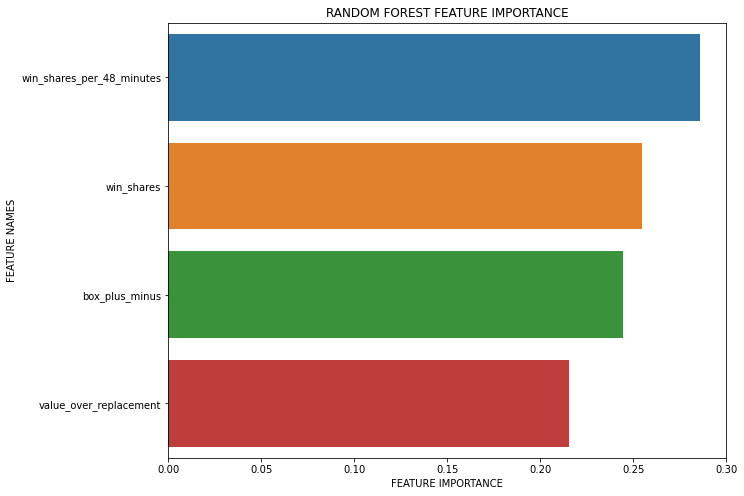

In [19]:
plot_feature_importance(rf_model_01.feature_importances_,X.columns,'RANDOM FOREST')